In [1]:
import pandas as pd
import altair as alt

In [2]:
raw_data = pd.read_csv("./Outputs/db.csv")
raw_data

time  fav_count            id lang  \
0     Tue Nov 29 15:31:21 +0000 2022        0.0  1.600000e+18   en   
1     Tue Nov 29 15:31:20 +0000 2022        0.0  1.600000e+18   en   
2     Tue Nov 29 15:31:18 +0000 2022        0.0  1.600000e+18   en   
3     Tue Nov 29 15:31:16 +0000 2022        0.0  1.600000e+18   en   
4     Tue Nov 29 15:31:13 +0000 2022        0.0  1.600000e+18   en   
...                              ...        ...           ...  ...   
4001  Wed Dec 07 05:04:38 +0000 2022        NaN           NaN   en   
4002  Wed Dec 07 05:04:28 +0000 2022        NaN           NaN   fr   
4003  Wed Dec 07 05:04:21 +0000 2022        NaN           NaN   en   
4004  Wed Dec 07 05:04:20 +0000 2022        NaN           NaN   en   
4005  Wed Dec 07 05:04:18 +0000 2022        NaN           NaN   en   

     possibly_sensitive                                             source  \
0                   NaN  <a href="http://twitter.com/download/iphone" r...   
1                   NaN  <a href="https://mobile.twitter.com" rel="nofo...   
2                   NaN  <a href="http://twitter.com/download/iphone" r...   
3                   NaN  <a href="http://twitter.com/download/iphone" r...   
4                 False  <a href="http://twitter.com/download/android" ...   
...                 ...                                                ...   
4001                NaN  <a href="https://mobile.twitter.com" rel="nofo...   
4002                NaN  <a href="http://twitter.com/download/iphone" r...   
4003                NaN  <a href="http://twitter.com/download/android" ...   
4004                NaN  <a href="http://twitter.com/download/iphone" r...   
4005                NaN  <a href="http://twitter.com/download/android" ...   

                                                   text       user.id  \
0                      I take 0 action without strategy  2.904332e+09   
1                               @GuidoDisalle gm Guido!  1.370000e+18   
2     @SleuthieGoosie Absolutely agree with you. Not...  2.993299e+08   
3     @ThisIsKyleR @elonmusk Yes, life must be soooo...  2.798719e+07   
4     @funstonpaleo So looking forward to seeing the...  7.250000e+17   
...                                                 ...           ...   
4001  @pravda_eng I guess Ukraine shouldn't have sur...           NaN   
4002          J’ai pas de billets pour Tiakola😡😡😭😭😭😭💔💔💔           NaN   
4003  @hollyanndoan So, Blacklocks was evicted, or w...           NaN   
4004  @shawnmicallef Looking forward to doing it Thu...           NaN   
4005              Wordle 536 3/6\n\n🟨🟩⬜⬜⬜\n⬜🟩🟨⬜🟩\n🟩🟩🟩🟩🟩           NaN   

                                            user.name     user.handle  \
0                                             Massoud         mxssoud   
1     aaronrferguson.eth (he/him) 🇺🇦 | Слава Україні!  aaronrferguson   
2                                             Middy T          middyt   
3                                            GeeGee23        GeeGee23   
4                      Michelle Campbell Mekarski PhD   MichelleCbell   
...                                               ...             ...   
4001                                              NaN             NaN   
4002                                              NaN             NaN   
4003                                              NaN             NaN   
4004                                              NaN             NaN   
4005                                              NaN             NaN   

                user.location dilbert_label  dilbert_score  label     score  
0             Ottawa, Ontario      NEGATIVE       0.995961    1.0  0.924041  
1           Ottawa, ON Canada      NEGATIVE       0.947551    5.0  0.498549  
2     Ottawa, Ontario, Canada      POSITIVE       0.984934    1.0  0.283423  
3                      Ottawa      NEGATIVE       0.997436    1.0  0.315153  
4             Ottawa, Ontario      POSITIVE       0.996623    5.0  0.428462  
...                       ...   

In [3]:
raw_data.drop_duplicates(['text'], inplace=True)
len(raw_data)

4006

In [4]:
location = {'Ottawa, Ontario': "Ottawa",
 'Ottawa, ON Canada': "Ottawa",
 'Ottawa, Ontario, Canada': "Ottawa",
 'Ottawa': "Ottawa",
 'Ottawa, ON': "Ottawa",
 'Gatineau, Québec':"Gatineau",
 'Ottawa, Canada': "Ottawa",
 'Ottawa ON': "Ottawa",
 'Ottawa, Ontario Canada': "Ottawa",
 'Ottawa Ontario': "Ottawa",
 'Ottawa, Ontario-canada': "Ottawa",
 'ottawa': "Ottawa",
 'Ottawa/Gatineau':'Ottawa/Gatineau',
 'Ottawa, ON, Canada': "Ottawa",
 'Canada, Ottawa': "Ottawa",
 'Ottawa, On': "Ottawa",
 'Gatineau, Québec Canada ':"Gatineau",
 'Toronto and Ottawa': "Ottawa/Toronto",  
 'Gatineau, Quebec, Canada':"Gatineau",
 'Gatineau, Qc':"Gatineau",
 'Ottawa,ON': "Ottawa",            
 'Toronto/Ottawa': "Ottawa/Toronto",            
 'Ottawa , Canada': "Ottawa",
 'ottawa, ontario': "Ottawa",
 'Ottawa, Canada ': "Ottawa",
 'ottawa ': "Ottawa",
 'Ottawa. Canada ': "Ottawa",
 'Ottawa, ON, CA': "Ottawa",
 'Gatineau':"Gatineau",
 'Ottawa ON.': "Ottawa",
 'Ottawa, Ontario, CANADA': "Ottawa",
 'Gatineau, Québec, Canada':"Gatineau",
 'Ottawa Canada': "Ottawa",
 'Ottawa ': "Ottawa",
 'Canada, Ottawa ': "Ottawa",
 'Gatineau, QC, Canada':"Gatineau",
 'Ottawa, ON ': "Ottawa",
 'Ottawa, ON & Gatineau, QC':'Ottawa/Gatineau',
 'Ottawa.': "Ottawa",
 'Ottawa-ON': "Ottawa",
 'OTTAWA CANADA': "Ottawa",
 'Ottawa, ON; Canada\n': "Ottawa",
 'Ottawa on ': "Ottawa",            
 'Chelsea QC':'Chelsea, QC',            
 'Ottawa🇨🇦': "Ottawa",
 'ottawa,ontario, canada': "Ottawa",
 'Ottawa On': "Ottawa",
 'Ottawa / Canada': "Ottawa",
 'Nepean': "Ottawa",
 'Ottawa, Ontario, Canada ': "Ottawa",
 'Ottawa ON, Canada': "Ottawa",
 'Ottawa Ontario Canada': "Ottawa",
 'OTTAWA ONTARIO CANADA': "Ottawa",
 'Ottawa, Ontario.': "Ottawa",     
 'オタワ':"Ottawa",   
 'Ottawa Ontario, Canada': "Ottawa",
 'Touraine':"Gatineau",
 'Vanier': "Ottawa",            
 'E-block': "Ottawa/Toronto",            
 'Ottava': "Ottawa",
 'Ottawa,Ontario': "Ottawa",
 'Ottawa - Gatineau':'Ottawa/Gatineau',
 'Ottawa, Ontario🇨🇦': "Ottawa",
 'Downtown Ottawa': "Ottawa",
 'Canada ottawa': "Ottawa",
 'Ottawa-Gatineau':'Ottawa/Gatineau',
 'Canada Ottawa': "Ottawa",
 'Calgary': "Calgary, AB", 
 'OTTAWA ': "Ottawa",
 'Ottawa, Ontario, CANADA ': "Ottawa",
 'YOW': "Ottawa",
 'Ottawa, Ontario - Canada': "Ottawa",
 'Ottawa-Gatineau, Canada':'Ottawa/Gatineau',
 'Hull, Québec':"Gatineau",            
 'Worldwide':  'Worldwide',            
 'Gatineau, Canada':"Gatineau",
 'Ottawa, Ontario CANADA': "Ottawa",
 'Ottawa,Ontario,Canada': "Ottawa",
 'Gatineau, Quebec ':"Gatineau",
 'Ottawa, ON  Canada': "Ottawa",
 'Ottawa, Ontario ': "Ottawa",
 'Ottawa (Canada)': "Ottawa",
 'Gatineau, QC':"Gatineau",
 'Gatineau Qc Canada ':"Gatineau",
 'Ottawa,Canada': "Ottawa",
 'Gatineau, Qc, Canada': "Ottawa",
 'Ottawa ON Canada': "Ottawa",
 'Near Ottawa': "Ottawa",
 'Ottawa, ON - Canada': "Ottawa",
 'Nepean, Ontario': "Ottawa",
 'Canada ottawa🇨🇩🌐🇨🇦': "Ottawa",            
 'Québec, Canada': 'Québec, QC',            
 'Chelsea, QC':'Chelsea, QC',            
 'Ottawa canada': "Ottawa",
 'Gatineau, Quebec':"Gatineau",
 'Chelsea Quebec Canada':'Chelsea, QC' ,
 'OTTAWA': "Ottawa",
 'gatineau':"Gatineau",
 'Ottawa, ontario': "Ottawa",
 'Ottawa, Chinada': "Ottawa",
 'Hull, Quebec':"Gatineau",
 'ottawa - gatineau':'Ottawa/Gatineau',            
 'Toronto & Ottawa': "Ottawa/Toronto",            
 'Ottawa, On. Canada': "Ottawa",            
 'Calgary, Alberta': "Calgary, AB",            
 'somewhere in Ottawa': "Ottawa",
 'Algonquin College': "Ottawa"
    
}

In [5]:
raw_data["user.location"] = raw_data["user.location"].map(location)

In [6]:
raw_data['user.location'].unique().tolist()

['Ottawa',
 'Gatineau',
 'Ottawa/Gatineau',
 'Ottawa/Toronto',
 'Chelsea, QC',
 nan,
 'Calgary, AB',
 'Worldwide',
 'Québec, QC']

# Dataframe metadata containing only :
* data.id
* data.time 
* data.lang
* data.text
* data.possibly_sensitive
* user.location
* user.id

In [7]:
#metadata = raw_data[['data.id', 'data.time', 'data.lang', 'data.text', 'data.possibly_sensitive','user.location', 'user.id' ]].copy()

# Exploring data using the tweets dataframe

In [8]:
tweets = raw_data.copy()

### List of the different languages 

In [9]:
len(tweets['lang'].unique())


37

### Distribution of languages 

In [10]:
eng = tweets[tweets['lang']== 'en']
fr = tweets[tweets['lang']== 'fr']
other = tweets[(tweets['lang']!= 'en')& (tweets['lang']!= 'fr')]

In [11]:
ratios =[]

### Ratio of english tweets

In [12]:
ratios.append(len(eng)/len(tweets))
print( f' {(len(eng)/len(tweets))*100:.2f} %')

 78.38 %


### Ratio of french tweets

In [13]:
ratios.append(len(fr)/len(tweets))
print( f' {(len(fr)/len(tweets))*100:.2f} %')

 6.02 %


### Ratio of tweets in other languages

In [14]:
ratios.append(len(other)/len(tweets))
print( f' {(len(other)/len(tweets))*100:.2f} %')

 15.60 %


In [15]:
other["lang"].value_counts().nlargest(6)

und    352
ar      33
es      32
fa      23
pt      19
tr      18
Name: lang, dtype: int64

In [16]:
toChart = tweets.copy()

class Lang(dict):
    def __missing__(self, key):
        return "other"

lang = { 'en':'en', 'fr':'fr'}
   
toChart['lang'] = toChart['lang'].map(Lang(lang))
toChart

time  fav_count            id lang  \
0     Tue Nov 29 15:31:21 +0000 2022        0.0  1.600000e+18   en   
1     Tue Nov 29 15:31:20 +0000 2022        0.0  1.600000e+18   en   
2     Tue Nov 29 15:31:18 +0000 2022        0.0  1.600000e+18   en   
3     Tue Nov 29 15:31:16 +0000 2022        0.0  1.600000e+18   en   
4     Tue Nov 29 15:31:13 +0000 2022        0.0  1.600000e+18   en   
...                              ...        ...           ...  ...   
4001  Wed Dec 07 05:04:38 +0000 2022        NaN           NaN   en   
4002  Wed Dec 07 05:04:28 +0000 2022        NaN           NaN   fr   
4003  Wed Dec 07 05:04:21 +0000 2022        NaN           NaN   en   
4004  Wed Dec 07 05:04:20 +0000 2022        NaN           NaN   en   
4005  Wed Dec 07 05:04:18 +0000 2022        NaN           NaN   en   

     possibly_sensitive                                             source  \
0                   NaN  <a href="http://twitter.com/download/iphone" r...   
1                   NaN  <a href="https://mobile.twitter.com" rel="nofo...   
2                   NaN  <a href="http://twitter.com/download/iphone" r...   
3                   NaN  <a href="http://twitter.com/download/iphone" r...   
4                 False  <a href="http://twitter.com/download/android" ...   
...                 ...                                                ...   
4001                NaN  <a href="https://mobile.twitter.com" rel="nofo...   
4002                NaN  <a href="http://twitter.com/download/iphone" r...   
4003                NaN  <a href="http://twitter.com/download/android" ...   
4004                NaN  <a href="http://twitter.com/download/iphone" r...   
4005                NaN  <a href="http://twitter.com/download/android" ...   

                                                   text       user.id  \
0                      I take 0 action without strategy  2.904332e+09   
1                               @GuidoDisalle gm Guido!  1.370000e+18   
2     @SleuthieGoosie Absolutely agree with you. Not...  2.993299e+08   
3     @ThisIsKyleR @elonmusk Yes, life must be soooo...  2.798719e+07   
4     @funstonpaleo So looking forward to seeing the...  7.250000e+17   
...                                                 ...           ...   
4001  @pravda_eng I guess Ukraine shouldn't have sur...           NaN   
4002          J’ai pas de billets pour Tiakola😡😡😭😭😭😭💔💔💔           NaN   
4003  @hollyanndoan So, Blacklocks was evicted, or w...           NaN   
4004  @shawnmicallef Looking forward to doing it Thu...           NaN   
4005              Wordle 536 3/6\n\n🟨🟩⬜⬜⬜\n⬜🟩🟨⬜🟩\n🟩🟩🟩🟩🟩           NaN   

                                            user.name     user.handle  \
0                                             Massoud         mxssoud   
1     aaronrferguson.eth (he/him) 🇺🇦 | Слава Україні!  aaronrferguson   
2                                             Middy T          middyt   
3                                            GeeGee23        GeeGee23   
4                      Michelle Campbell Mekarski PhD   MichelleCbell   
...                                               ...             ...   
4001                                              NaN             NaN   
4002                                              NaN             NaN   
4003                                              NaN             NaN   
4004                                              NaN             NaN   
4005                                              NaN             NaN   

     user.location dilbert_label  dilbert_score  label     score  
0           Ottawa      NEGATIVE       0.995961    1.0  0.924041  
1           Ottawa      NEGATIVE       0.947551    5.0  0.498549  
2           Ottawa      POSITIVE       0.984934    1.0  0.283423  
3           Ottawa      NEGATIVE       0.997436    1.0  0.315153  
4           Ottawa      POSITIVE       0.996623    5.0  0.428462  
...            ...           ...            ...    ...       ...  
4001           NaN      NEGATIV

### Visualization

In [17]:
mixed_lang=alt.Chart(toChart).encode(
    y= alt.Y("count(lang):N", title = ""),
    color = alt.Color('lang', title = "", scale=alt.Scale(scheme='set2'))
    
).mark_bar().properties(
    width=50,
    height=300
).facet(
'lang:N',
    columns = 3,
    title="Count of tweets per languages"
)

<AxesSubplot:ylabel='ratio'>

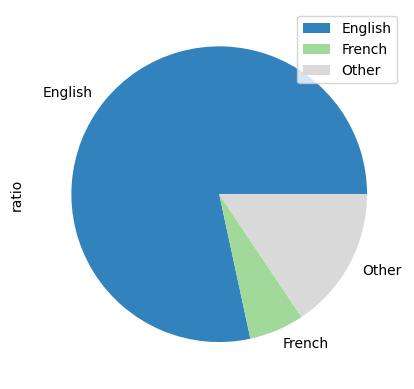

In [18]:
toPlot = pd.DataFrame({'ratio':ratios},
                     index = ['English','French','Other'])
toPlot.plot.pie(y= 'ratio',colormap = 'tab20c')


In [19]:
en_fr_ratios = []
en_fr = pd.concat([eng,fr])
en_fr_ratios.append(len(eng)/len(en_fr))
print( f' {(len(eng)/len(en_fr))*100:.2f} %')

 92.87 %


In [20]:

en_fr_ratios.append(len(fr)/len(en_fr))
print( f' {(len(fr)/len(en_fr))*100:.2f} %')

 7.13 %


<AxesSubplot:ylabel='ratio'>

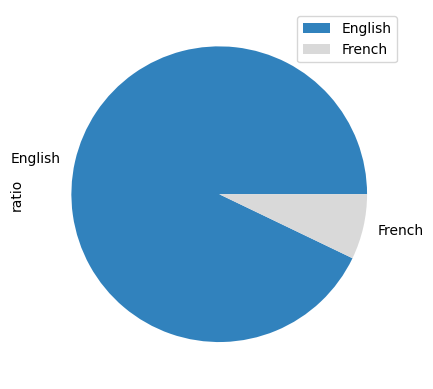

In [21]:
toPlot = pd.DataFrame({'ratio':en_fr_ratios},
                     index = ['English','French'])
toPlot.plot.pie(y= 'ratio',colormap = 'tab20c')


In [22]:
mixed_lang

alt.FacetChart(...)

Since there are so many tweets that are not in english nor french,

Here is a dataframe containing only english and french tweets

# Dataframe en_fr_tweets containing only english and french tweets

In [23]:
en_fr_tweets = tweets[(tweets['lang']== 'en') | (tweets['lang']== 'fr') ].copy()
en_fr_tweets

time  fav_count            id lang  \
0     Tue Nov 29 15:31:21 +0000 2022        0.0  1.600000e+18   en   
1     Tue Nov 29 15:31:20 +0000 2022        0.0  1.600000e+18   en   
2     Tue Nov 29 15:31:18 +0000 2022        0.0  1.600000e+18   en   
3     Tue Nov 29 15:31:16 +0000 2022        0.0  1.600000e+18   en   
4     Tue Nov 29 15:31:13 +0000 2022        0.0  1.600000e+18   en   
...                              ...        ...           ...  ...   
4001  Wed Dec 07 05:04:38 +0000 2022        NaN           NaN   en   
4002  Wed Dec 07 05:04:28 +0000 2022        NaN           NaN   fr   
4003  Wed Dec 07 05:04:21 +0000 2022        NaN           NaN   en   
4004  Wed Dec 07 05:04:20 +0000 2022        NaN           NaN   en   
4005  Wed Dec 07 05:04:18 +0000 2022        NaN           NaN   en   

     possibly_sensitive                                             source  \
0                   NaN  <a href="http://twitter.com/download/iphone" r...   
1                   NaN  <a href="https://mobile.twitter.com" rel="nofo...   
2                   NaN  <a href="http://twitter.com/download/iphone" r...   
3                   NaN  <a href="http://twitter.com/download/iphone" r...   
4                 False  <a href="http://twitter.com/download/android" ...   
...                 ...                                                ...   
4001                NaN  <a href="https://mobile.twitter.com" rel="nofo...   
4002                NaN  <a href="http://twitter.com/download/iphone" r...   
4003                NaN  <a href="http://twitter.com/download/android" ...   
4004                NaN  <a href="http://twitter.com/download/iphone" r...   
4005                NaN  <a href="http://twitter.com/download/android" ...   

                                                   text       user.id  \
0                      I take 0 action without strategy  2.904332e+09   
1                               @GuidoDisalle gm Guido!  1.370000e+18   
2     @SleuthieGoosie Absolutely agree with you. Not...  2.993299e+08   
3     @ThisIsKyleR @elonmusk Yes, life must be soooo...  2.798719e+07   
4     @funstonpaleo So looking forward to seeing the...  7.250000e+17   
...                                                 ...           ...   
4001  @pravda_eng I guess Ukraine shouldn't have sur...           NaN   
4002          J’ai pas de billets pour Tiakola😡😡😭😭😭😭💔💔💔           NaN   
4003  @hollyanndoan So, Blacklocks was evicted, or w...           NaN   
4004  @shawnmicallef Looking forward to doing it Thu...           NaN   
4005              Wordle 536 3/6\n\n🟨🟩⬜⬜⬜\n⬜🟩🟨⬜🟩\n🟩🟩🟩🟩🟩           NaN   

                                            user.name     user.handle  \
0                                             Massoud         mxssoud   
1     aaronrferguson.eth (he/him) 🇺🇦 | Слава Україні!  aaronrferguson   
2                                             Middy T          middyt   
3                                            GeeGee23        GeeGee23   
4                      Michelle Campbell Mekarski PhD   MichelleCbell   
...                                               ...             ...   
4001                                              NaN             NaN   
4002                                              NaN             NaN   
4003                                              NaN             NaN   
4004                                              NaN             NaN   
4005                                              NaN             NaN   

     user.location dilbert_label  dilbert_score  label     score  
0           Ottawa      NEGATIVE       0.995961    1.0  0.924041  
1           Ottawa      NEGATIVE       0.947551    5.0  0.498549  
2           Ottawa      POSITIVE       0.984934    1.0  0.283423  
3           Ottawa      NEGATIVE       0.997436    1.0  0.315153  
4           Ottawa      POSITIVE       0.996623    5.0  0.428462  
...            ...           ...            ...    ...       ...  
4001           NaN      NEGATIV

## Distribution of languages

### Ratio of english tweets

In [24]:
print( f' {(len(eng)/len(en_fr_tweets))*100:.2f} %')

 92.87 %


### Ratio of french tweets

In [25]:
print( f' {(len(fr)/len(en_fr_tweets))*100:.2f} %')

 7.13 %


### Visualization

In [26]:
en_fr = alt.Chart(en_fr_tweets).encode(
    y= alt.Y("count(lang):N", title = ""),
    color = alt.Color('lang', title = "", scale=alt.Scale(scheme='set2'))
    
).mark_bar().properties(
    width=50,
    height=300
).facet(
'lang:N',
    columns = 2,
    title="Count of tweets per languages"
)

In [27]:
en_fr

alt.FacetChart(...)

In [28]:
text = tweets['text'].tolist()

In [29]:
import word

In [30]:
df = word.count({''.join(text)}, word.stop_words)

# Top 10 global words

In [46]:
df.nlargest(10, 'count').reset_index()[['word','count']]


word  count
0  people     98
1    good     78
2  ottawa     67
3     day     64
4    time     61
5     new     59
6  canada     57
7   right     56
8    need     55
9    love     52

# Global Wordcloud

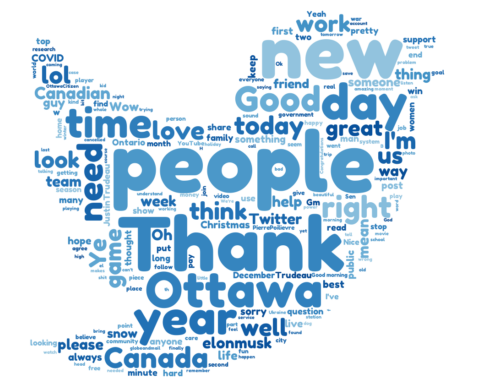

In [32]:
import matplotlib.pyplot as plt
# Display the generated image:
plt.imshow(word.tweet_cloud({" ".join(text)}, word.stop_words), interpolation='bilinear')
plt.axis("off")
plt.savefig("./Outputs/global_wordcloud.png")

In [33]:
en_text =eng['text'].tolist()


In [34]:
df_en= word.count({''.join(en_text)}, word.stop_words)

# Top 10 english words

In [45]:
df_en.nlargest(10, 'count').reset_index()[['word','count']]

word  count
0  people     98
1    good     78
2     day     63
3    time     61
4  ottawa     60
5     new     58
6   right     56
7    need     54
8  canada     52
9    love     52

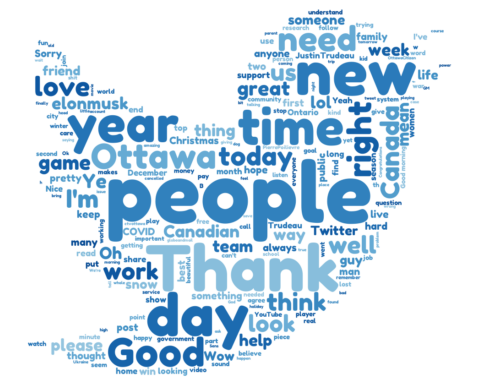

In [36]:
# Display the generated image:
plt.imshow(word.tweet_cloud({" ".join(en_text)}, word.stop_words), interpolation='bilinear')
plt.axis("off")
plt.savefig("./Outputs/eng_wordcloud.png")

In [37]:
fr_text =fr['text'].tolist()


In [38]:
dfr = word.count({''.join(fr_text)}, word.stop_words)

# Top 10 french words

In [47]:
dfr.nlargest(10, 'count').reset_index()[['word','count']]

word  count
0    trajet     14
1   station     10
2    annulé      8
3      jour      8
4      bien      7
5     booba      7
6  prochain      7
7    comité      6
8   minutes      6
9  montréal      6

# French wordcloud

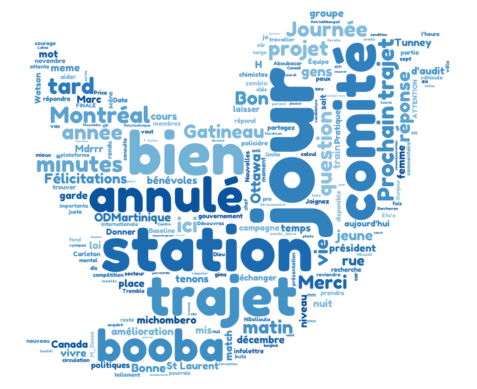

In [40]:
# Display the generated image:
plt.imshow(word.tweet_cloud({" ".join(fr_text)}, word.stop_words), interpolation='bilinear')
plt.axis("off")
plt.savefig("./Outputs/french_wordcloud.png")

In [67]:
booba = tweets[tweets["text"].str.contains("booba")][["text","user.handle"]]

In [69]:
booba

text   user.handle
467                           @AlexSaiz10 mmm  booba..,      MikeMeld
1302  @Beugrefidelpio @toumi386 @booba Mdrr tu tremb...  AlphaDiakit9
1317  @toumi386 @booba @Beugrefidelpio Lol je parle ...  AlphaDiakit9
1340  @Beugrefidelpio @booba Mdrrr va voir sur n'imp...  AlphaDiakit9
1517  @Beugrefidelpio @toumi386 @booba @Sdm__92 Trem...  AlphaDiakit9
1628  @Beugrefidelpio @M_Dooze @booba Mdrrr le gener...  AlphaDiakit9
1664   @Beugrefidelpio @M_Dooze @booba La sucette'zerr🍭  AlphaDiakit9
1672  @Beugrefidelpio @toumi386 @booba @Sdm__92 On s...  AlphaDiakit9

# Top 10 words in other languages

In [41]:
other_text =other['text'].tolist()


In [42]:
df_other = word.count({''.join(other_text)}, word.stop_words)

In [43]:
df_other.nlargest(10, 'count').reset_index()

index   word  count
0   1092    min     16
1   2311     ضد     12
2    570     el     11
3     34   2022     10
4   2420     من     10
5    162  alfie      9
6    673     ft      9
7   1010    lol      9
8     16     12      8
9    148    agl      8

# Wordcloud for other languages

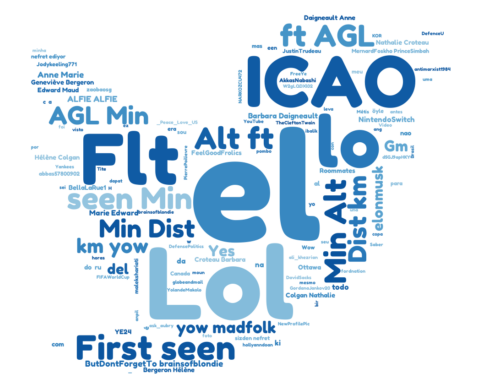

In [44]:
# Display the generated image:
plt.imshow(word.tweet_cloud({" ".join(other_text)}, word.stop_words), interpolation='bilinear')
plt.axis("off")
plt.savefig("./Outputs/other_wordcloud.png")